In [77]:
#pip install nbformat
#pip install plotly --upgrade

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import h5py
from scipy.interpolate import RegularGridInterpolator
from scipy.io import loadmat

#%matplotlib widget 
#for interactive plot, uncomment line above.

from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
parula_map.set_under(cm_data[0])

In [88]:
filename          = '/home/devlamin/WKbeam_simulations/TCV_86148_0.6_fluct/output/QLdiff_nofluct.h5'

file = h5py.File(filename, 'r')

freq = file['FreqGHz'][()]

rho_abs = file['rho_abs'][()]
dP_drho = file['dP_drho'][()]

# Select the wanted grid
grid = 'hh'
dataname = 'DRF0_' + grid

psi = file['psi'][()]
p_norm_w = file['p_norm_w'][()] * 0.0664
p_norm_h = file['p_norm_h'][()] * 0.0664 # Normalised to mc
ksi0_w = file['ksi0_w'][()]
ksi0_h = file['ksi0_h'][()]
harmonics = file['harmonics'][()]

Trapksi0_w = file['Trapksi0_w'][()]
Trapksi0_h = file['Trapksi0_h'][()]

QL_bounce_sparse = file[dataname + '_sparse'][()]
QL_mask = file['mask_'+dataname][()]

file.close()



if grid == 'wh':

    p_norm = p_norm_w
    ksi0 = ksi0_h
    Trapksi0 = Trapksi0_h

elif grid == 'hw':

    p_norm = p_norm_h
    ksi0 = ksi0_w
    Trapksi0 = Trapksi0_w

else:

    p_norm = p_norm_h
    ksi0 = ksi0_h
    Trapksi0 = Trapksi0_h

p_max = 1.5#np.max(p_norm)
rho_max = np.max(np.sqrt(psi))


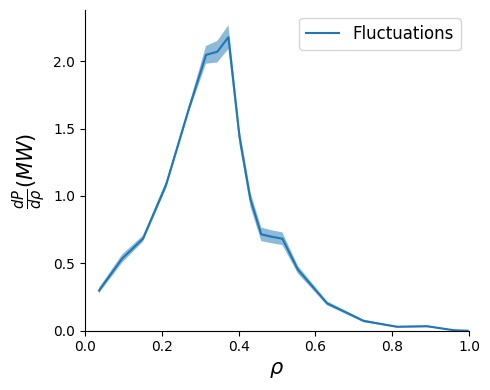

In [79]:
plt.figure(figsize=(5,4))
ax = plt.subplot(111)
ax.plot(rho_abs, dP_drho[:, 0], label='Fluctuations')
ax.fill_between(rho_abs, dP_drho[:, 0]-dP_drho[:, 1], dP_drho[:, 0]+dP_drho[:, 1], alpha=0.5)
ax.set_xlabel(r'$\rho$', fontsize=15)
ax.set_ylabel(r'$\frac{dP}{d\rho}(MW)$', fontsize=15)
ax.set_xlim([0, 1])
ax.set_ylim(0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(fontsize=12)
plt.tight_layout()

plt.show()


In [80]:
QL_bounce_flat = np.zeros(p_norm_h.shape[0]*ksi0_h.shape[0]*psi.shape[0]*harmonics.shape[0])
QL_bounce_flat[QL_mask] = QL_bounce_sparse
QL_bounce = QL_bounce_flat.reshape((p_norm_h.shape[0], ksi0_h.shape[0], psi.shape[0], harmonics.shape[0]), order='F')
QL_bounce = np.transpose(QL_bounce, (1, 0, 2, 3))
print(QL_bounce.shape)

(170, 200, 100, 2)


In [81]:
Pnorm, Ksi0 = np.meshgrid(p_norm, ksi0)

Ppar, Pper = Pnorm*Ksi0, Pnorm*np.sqrt(1-Ksi0**2)
PPAR = np.repeat(np.expand_dims(Ppar, 2), len(psi), axis=2)
PPER = np.repeat(np.expand_dims(Pper, 2), len(psi), axis=2)
KSI0 = np.repeat(np.expand_dims(Ksi0, 2), len(psi), axis=2)

RHO = np.tile(np.sqrt(psi.T), (len(p_norm), len(ksi0),1))
RHO = np.transpose(RHO, (1, 0, 2))

# Add the different harmonics
DRF_pp = np.sum(QL_bounce, axis=3)*(1-KSI0**2)


print(QL_bounce.shape)
print(DRF_pp.shape)
print(PPER.shape)
print(PPAR.shape)
print(RHO.shape)
print(KSI0.shape)

(170, 200, 100, 2)
(170, 200, 100)
(170, 200, 100)
(170, 200, 100)
(170, 200, 100)
(170, 200, 100)


In [82]:
def Trapping_line(p_par, Trapksi0, i_psi):
    #Trapping line, giving p_perp_Trap = p_par_Trap * sqrt(1 - ksi0_T^2)/ksi0_T*sign(p_par_Trap)
    return np.sign(p_par) * p_par * np.sqrt(1 - Trapksi0[i_psi]**2)/Trapksi0[i_psi]


In [83]:
# To filter out the wanted harmonics:
harmonics_to_show = [2,3]

rho_flat = np.tile(np.sqrt(psi), (len(p_norm), len(ksi0), len(harmonics), 1))
rho_flat = np.transpose(rho_flat, (0, 1, 3, 2)).flatten(order='F')
p_norm_flat = np.tile(p_norm, (len(ksi0), len(psi), len(harmonics), 1)) 
p_norm_flat = np.transpose(p_norm_flat, (3, 0, 1, 2)).flatten(order='F')
ksi0_flat = np.tile(ksi0, (len(p_norm), len(psi), len(harmonics), 1))
ksi0_flat = np.transpose(ksi0_flat, (0, 3, 1, 2)).flatten(order='F')
harmonics_flat = np.tile(harmonics, (len(p_norm), len(ksi0), len(psi), 1))
harmonics_flat = np.transpose(harmonics_flat, (0, 1, 2, 3)).flatten(order='F')


# For the fluct case
rho_values_sparse = rho_flat[QL_mask]
p_norm_values_sparse = p_norm_flat[QL_mask]
ksi0_values_sparse = ksi0_flat[QL_mask]
harmonics_values_sparse = harmonics_flat[QL_mask]
#
ppar_values_sparse = p_norm_values_sparse*ksi0_values_sparse
pper_values_sparse = p_norm_values_sparse*np.sqrt(1-ksi0_values_sparse**2)
#
#
rho_values_toshow = rho_values_sparse[np.isin(harmonics_values_sparse, harmonics_to_show)]
p_norm_values_toshow = p_norm_values_sparse[np.isin(harmonics_values_sparse, harmonics_to_show)]
ksi0_values_toshow = ksi0_values_sparse[np.isin(harmonics_values_sparse, harmonics_to_show)]
#
ppar_values_toshow = ppar_values_sparse[np.isin(harmonics_values_sparse, harmonics_to_show)]
pper_values_toshow = pper_values_sparse[np.isin(harmonics_values_sparse, harmonics_to_show)]
#
QL_values_toshow = np.expand_dims(QL_bounce_sparse, axis=0)[np.isin(harmonics_values_sparse, harmonics_to_show)]
# Create Drf_pp from QL
DRF_pp_toshow = QL_values_toshow*(1-ksi0_values_toshow**2)
# Normalize the Drf_pp values to non-fluctuating case
DRF_pp_toshow = DRF_pp_toshow/np.max(DRF_pp_toshow)
DRF_pp_toshow = np.where(DRF_pp_toshow > 1e-3, DRF_pp_toshow, 0)

In [160]:
np.max(rho_values_toshow)

0.9952613350271375

/tmp/ipykernel_2265058/4122719175.py:12: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(rho_values_toshow[mask], ppar_values_toshow[mask], pper_values_toshow[mask], c=np.log10(DRF_pp_toshow[mask]), cmap=parula_map, s=3*DRF_pp_toshow[mask]**0.5, alpha=.03, zorder=2*len(psi)-2*i)


pmax: 1.5


/tmp/ipykernel_2265058/4122719175.py:40: RuntimeWarning: invalid value encountered in sqrt
  Pper1 = np.sqrt(0.0664**2 - Ppar**2)
/tmp/ipykernel_2265058/4122719175.py:41: RuntimeWarning: invalid value encountered in sqrt
  Pper10 = np.sqrt(0.664**2 - Ppar**2)


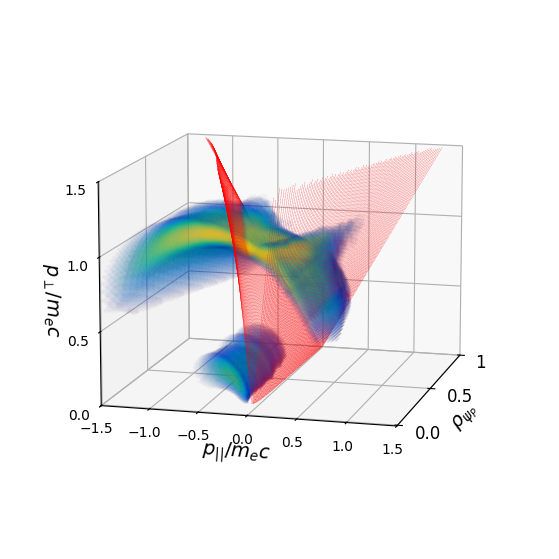

In [195]:
# 3D plot of the QL_bounce

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(rho_values_toshow, ppar_values_toshow, pper_values_toshow, c=np.log10(DRF_pp_toshow), cmap=parula_map, s=3*DRF_pp_toshow**0.5, alpha=.01, zorder=1)


# Plot the trapping line at every rho
p_par_T = np.linspace(-p_max, p_max, 200)
for i in range(0, len(psi)-1):
    mask = (rho_values_toshow >= np.sqrt(psi[i])) & (rho_values_toshow < np.sqrt(psi[i+1]))
    ax.scatter(rho_values_toshow[mask], ppar_values_toshow[mask], pper_values_toshow[mask], c=np.log10(DRF_pp_toshow[mask]), cmap=parula_map, s=3*DRF_pp_toshow[mask]**0.5, alpha=.03, zorder=2*len(psi)-2*i)

    p_perp_T = Trapping_line(p_par_T, Trapksi0, i)
    # Cut the line short when it would leave the box
    p_perp_T_toplot = p_perp_T[(p_perp_T > 0) & (p_perp_T < p_max)]
    p_par_T_toplot = p_par_T[(p_perp_T > 0) & (p_perp_T < p_max)]
    ax.plot(np.sqrt(psi[i])*np.ones_like(p_par_T_toplot), p_par_T_toplot, p_perp_T_toplot, color='r', linestyle='--', linewidth=0.2, zorder=2*len(psi)+1-2*i)

ax.set_xlabel(r'$\rho_{\psi_P}$', fontsize= 14, rotation=-30, verticalalignment='baseline', horizontalalignment='left')
ax.set_ylabel(r'$p_{||}/m_e c$' , fontsize= 14)
ax.set_zlabel(r'$p_{\perp}/m_e c$', fontsize= 14, rotation=180)


pmax = 1.5# np.max(p_norm)
print('pmax:', pmax)
ax.set_xlim([1, -0.01])
ax.set_xticks([0.0, 0.5, 1])
ax.set_xticklabels([0.0, 0.5, 1], fontsize=12, rotation=0, verticalalignment='baseline', horizontalalignment='left')
ax.set_ylim([-p_max, p_max])
ax.set_yticks([-1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5])
ax.set_zlim([0, p_max])
ax.set_zticks([0, 0.5, 1.0, 1.5])

ax.view_init(elev=12, azim=15)
ax.set_box_aspect(None, zoom=0.85)

# Plot contours at p=p_perp**2 + p_par**2
Rho, Ppar = np.meshgrid(np.sqrt(psi), np.linspace(-pmax, p_max, 2000))
Pper1 = np.sqrt(0.0664**2 - Ppar**2)
Pper10 = np.sqrt(0.664**2 - Ppar**2)

#ax.contourf(Rho, Ppar, Pper1, zdir='z', levels=100, colors='grey', alpha=0.4, zorder=1)
#ax.contourf(Rho, Ppar, Pper10, zdir='z', levels=100, colors='grey', alpha=0.4, zorder=1)

# Annotate the 2 contours
#ax.text(0, 0.3, 0.1, '$p_{th}$')
#ax.text(0, 1.2, 0.5, '$10 p_{th}$')
plt.savefig('Drf.pdf')
plt.show()


/tmp/ipykernel_2265058/3472516305.py:5: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(rho_values_toshow, ppar_values_toshow, pper_values_toshow, c=np.log10(DRF_pp_toshow), cmap=parula_map, s=3*DRF_pp_toshow**0.5, alpha=.01, zorder=1)


pmax: 1.5


/tmp/ipykernel_2265058/3472516305.py:38: RuntimeWarning: invalid value encountered in sqrt
  Pper1 = np.sqrt(0.0664**2 - Ppar**2)
/tmp/ipykernel_2265058/3472516305.py:39: RuntimeWarning: invalid value encountered in sqrt
  Pper10 = np.sqrt(0.664**2 - Ppar**2)


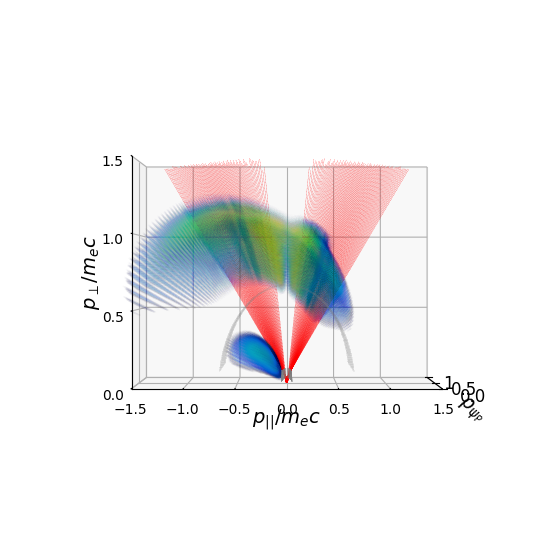

In [136]:
# 3D plot of the QL_bounce

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rho_values_toshow, ppar_values_toshow, pper_values_toshow, c=np.log10(DRF_pp_toshow), cmap=parula_map, s=3*DRF_pp_toshow**0.5, alpha=.01, zorder=1)


# Plot the trapping line at every rho
p_par_T = np.linspace(-p_max, p_max, 200)
for i in range(0, len(psi)):
    p_perp_T = Trapping_line(p_par_T, Trapksi0, i)
    # Cut the line short when it would leave the box
    p_perp_T_toplot = p_perp_T[(p_perp_T > 0) & (p_perp_T < p_max)]
    p_par_T_toplot = p_par_T[(p_perp_T > 0) & (p_perp_T < p_max)]
    ax.plot(np.sqrt(psi[i])*np.ones_like(p_par_T_toplot), p_par_T_toplot, p_perp_T_toplot, color='r', linestyle='--', linewidth=0.2, zorder=2)

ax.set_xlabel(r'$\rho_{\psi_P}$', fontsize= 14, rotation=-30, verticalalignment='baseline', horizontalalignment='left')
ax.set_ylabel(r'$p_{||}/m_e c$' , fontsize= 14)
ax.set_zlabel(r'$p_{\perp}/m_e c$', fontsize= 14, rotation=180)


pmax = 1.5# np.max(p_norm)
print('pmax:', pmax)
ax.set_xlim([1, -0.01])
ax.set_xticks([0.0, 0.5, 1])
ax.set_xticklabels([0.0, 0.5, 1], fontsize=12, rotation=0, verticalalignment='baseline', horizontalalignment='left')
ax.set_ylim([-p_max, p_max])
ax.set_yticks([-1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5])
ax.set_zlim([0, p_max])
ax.set_zticks([0, 0.5, 1.0, 1.5])
ax.set_aspect('equal')

ax.view_init(elev=0, azim=0)
ax.set_box_aspect(None, zoom=0.85)

# Plot contours at p=p_perp**2 + p_par**2
Rho, Ppar = np.meshgrid(np.sqrt(psi), np.linspace(-pmax, p_max, 200))
Pper1 = np.sqrt(0.0664**2 - Ppar**2)
Pper10 = np.sqrt(0.664**2 - Ppar**2)

ax.contourf(Rho, Ppar, Pper1, zdir='z', levels=100, colors='grey', alpha=0.1)
ax.contourf(Rho, Ppar, Pper10, zdir='z', levels=100, colors='grey', alpha=0.1)